<a href="https://colab.research.google.com/github/Imama-Kainat/ByteWise-MLDL/blob/main/NobelPrizeVisual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nobel Prize (Visualaization)


Details:

https://drive.google.com/drive/folders/1obJZ3dOfUXRgNLI-YyUkjVCdgLeQWiUj

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [24]:
df.describe()

,year,laureate_id
count,1000.000000,1000.000000
mean,1973.721000,509.099000
std,34.523195,298.130617
min,1901.000000,1.000000
25%,1949.750000,250.750000
50%,1979.000000,500.500000
75%,2003.000000,764.250000
max,2023.000000,1034.000000


In [33]:
# Most commonly awarded gender and birth country
top_gender = df['sex'].value_counts().idxmax()#....1 find max among them
top_country = df['birth_country'].value_counts().idxmax()
print("Most commonly awarded gender:", top_gender)
print("Most commonly awarded birth country:", top_country)
#topgender = df['sex'].value_counts().index[0].....2 the array formed where according to count presn,index1 has max value
#top_gender = df['sex'].mode()[0]..................3


Most commonly awarded gender: Male
Most commonly awarded birth country: United States of America


Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

Store this as an integer called max_decade_usa.

In [26]:
df['usa_born_winner'] = df['birth_country'] == 'United States of America'#column indicating whether the winner is USA-born
df['decade'] = (df['year'] // 10) * 10#Create a column for the decade
prop_usa_winners = df.groupby('decade')['usa_born_winner'].mean()#Calculate the proportion of USA-born winners per decade
max_decade_usa = prop_usa_winners.idxmax()#decade with the highest proportion of USA-born winners
print("Decade with highest ratio of US-born Nobel Prize winners:", max_decade_usa)

Decade with highest ratio of US-born Nobel Prize winners: 2000


Which decade and Nobel Prize category combination had the highest proportion of female laureates?

Store this as a dictionary called max_female_dict where the decade is the key and the category is the value.

In [27]:
#creates a new column female_winner in the DataFrame df. It assigns True to rows where the 'sex' column is 'Female', indicating female winners, and False otherwise.
df['female_winner'] = df['sex'] == 'Female'

# df is grouped by 'decade' and 'category'.
# calculates the mean of the female_winner column within each group,
prop_female_winners = df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

#  finds the index (row) where the female_winner column has the maximum value
#selects the row based on this index and retrieves the 'decade' and 'category' columns.
max_female_decade_category = prop_female_winners.loc[prop_female_winners['female_winner'].idxmax(), ['decade', 'category']]

# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade']: max_female_decade_category['category']}
print(max_female_dict)

{2020: 'Literature'}


Who was the first woman to receive a Nobel Prize, and in what category?

Save your string answers as first_woman_name and first_woman_category.

In [28]:
# create DataFrame having only rows where the sex column is Female.
n_women = df[df['sex'] == 'Female']
# create DataFrame, filters again to find entries where the 'year' column matches the minimum year value
first_woman = n_women[n_women['year'] == n_women['year'].min()]
# Retrieves the full name ,.values[0] accesses the first (and only) value in the 'full_name' column.
# Extract the name and category of the first woman winner
first_woman_name = first_woman['full_name'].values[0]
first_woman_category = first_woman['category'].values[0]
print("First woman to receive a Nobel Prize:", first_woman_name)
print("Category:", first_woman_category)

First woman to receive a Nobel Prize: Marie Curie, née Sklodowska
Category: Physics


Which individuals or organizations have won more than one Nobel Prize throughout the years?

Store the full names in a list named repeat_list.

In [34]:
# Counts how many Nobel Prizes each person or organization has won.
counts = df['full_name'].value_counts()
# filter having value greater than 2
repeats = counts[counts >= 2].index
# list of individuals or organizations who have won more than one Nobel Prize
repeat_list = list(repeats)
print("Individuals or organizations with more than one Nobel Prize:", repeat_list)

Individuals or organizations with more than one Nobel Prize: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


<ipython-input-36-f954471d782d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='pastel')


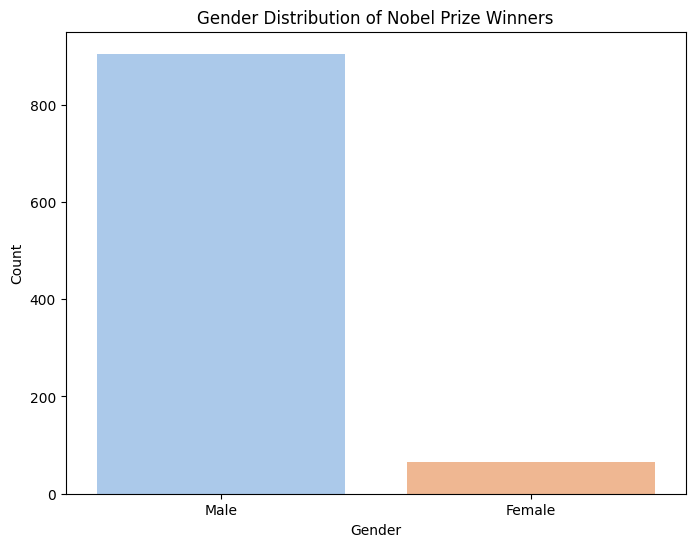

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Gender Distribution of Nobel Prize Winners')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<ipython-input-38-a285f3304fe7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='muted')


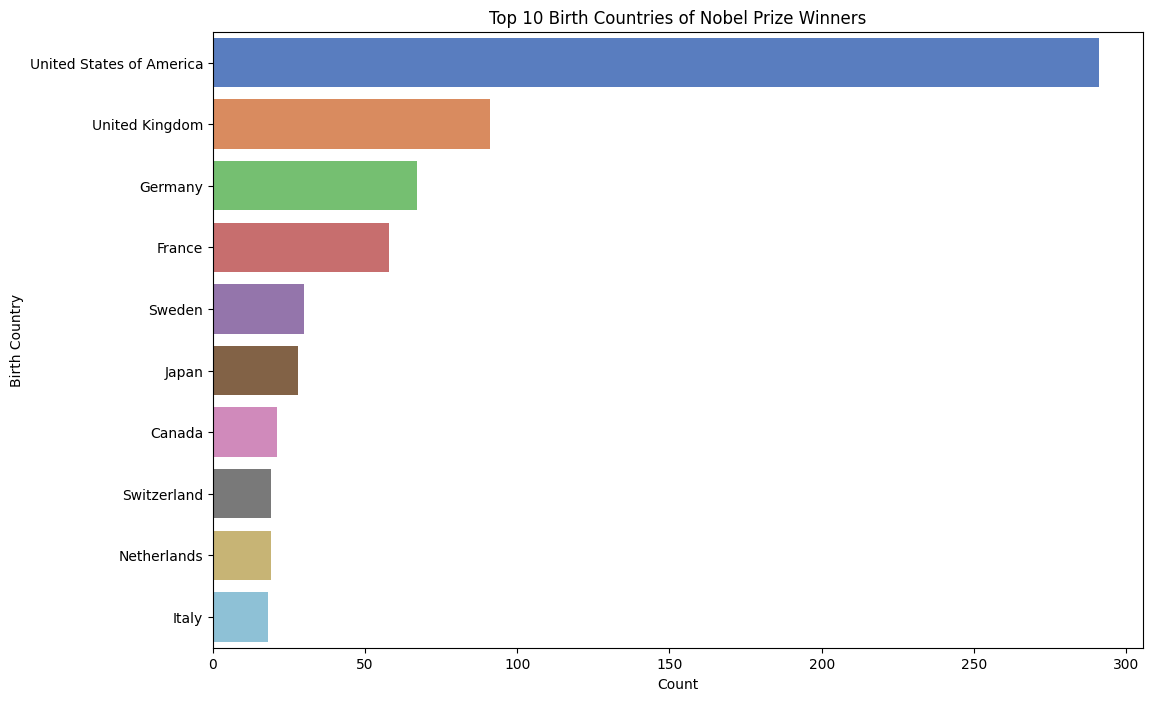

In [38]:
# Plot 2: Top 10 Birth Countries
plt.figure(figsize=(12, 8))
top_countries = df['birth_country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='muted')
plt.title('Top 10 Birth Countries of Nobel Prize Winners')
plt.xlabel('Count')
plt.ylabel('Birth Country')
plt.show()

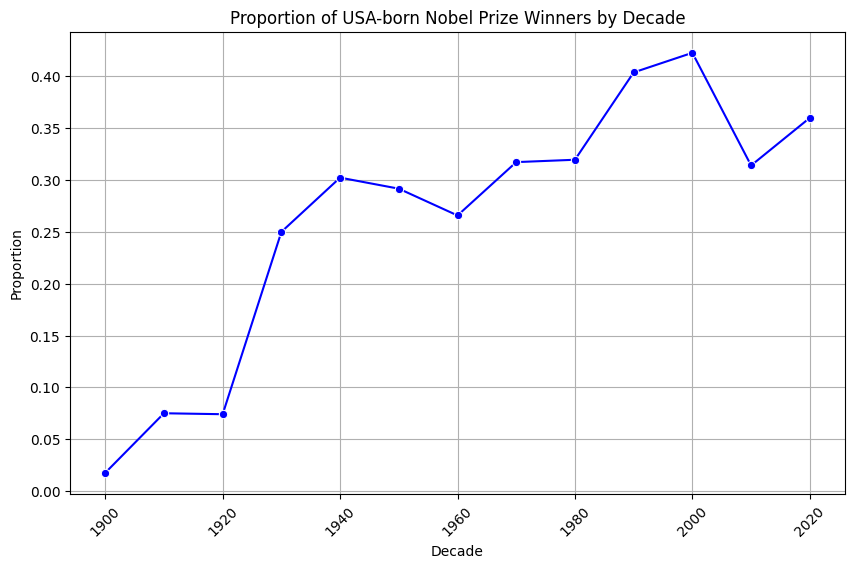

In [41]:
# Plot 3: Proportion of USA-born Winners by Decade
df['usa_born_winner'] = df['birth_country'] == 'United States of America'
df['decade'] = (np.floor(df['year'] / 10) * 10).astype(int)
prop_usa_winners = df.groupby('decade')['usa_born_winner'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners, marker='o', color='b')
plt.title('Proportion of USA-born Nobel Prize Winners by Decade')
plt.xlabel('Decade')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

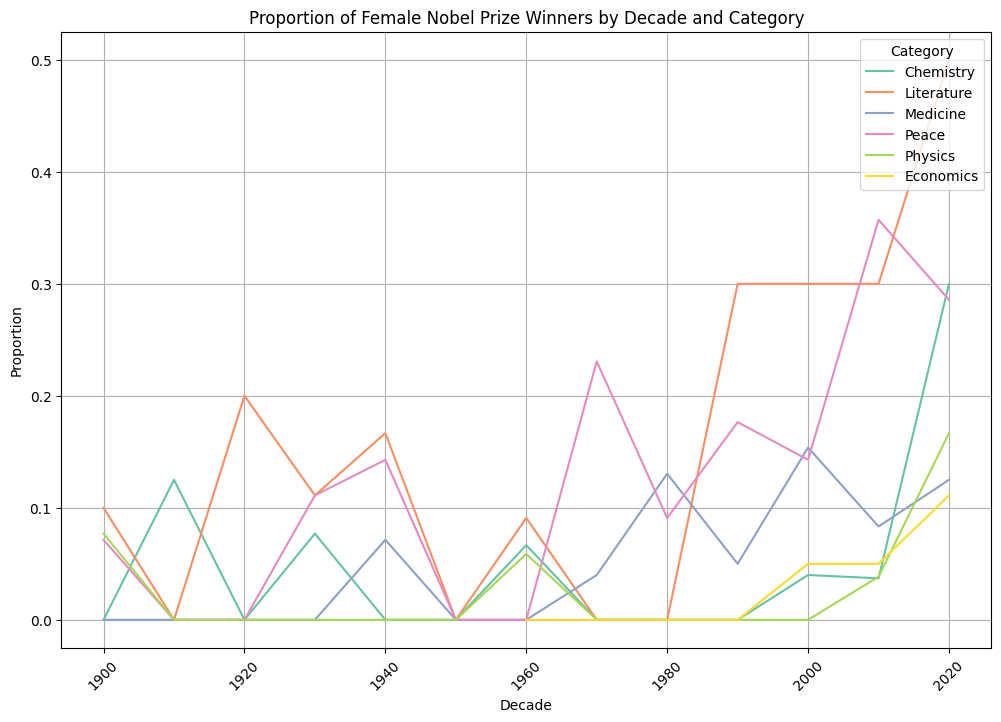

In [43]:
# Plot 4: Proportion of Female Winners by Decade and Category
df['female_winner'] = df['sex'] == 'Female'
prop_female_winners = df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

plt.figure(figsize=(12, 8))
sns.lineplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, palette='Set2')
plt.title('Proportion of Female Nobel Prize Winners by Decade and Category')
plt.xlabel('Decade')
plt.ylabel('Proportion')
plt.legend(title='Category', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()